In [24]:
#程式碼取自 博碩, "Python 機器學習", ISBN 978-986-434-140-5, by Sebastian Raschka, 為練習Python函式庫用途
#僅供履歷作品集使用
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
from sklearn.preprocessing import LabelEncoder

X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M','B'])

array([1, 0], dtype=int64)

In [25]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', LogisticRegression(random_state=1))])

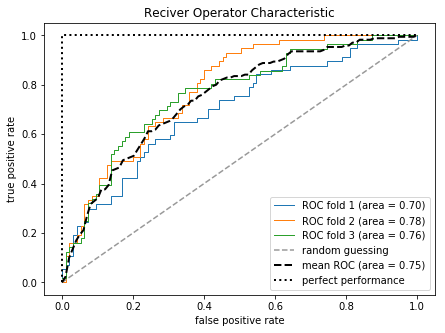

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy import interp
X_train2 = X_train[:,[4,14]]
cv = StratifiedKFold(y_train,n_folds=3,random_state=1)
fig=plt.figure(figsize=(7,5))
mean_tpr=0.0
mean_fpr=np.linspace(0,1,100)
all_tpr=[]
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],probas[:,1],pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,lw=1,label='ROC fold %d (area = %0.2f)' % (i+1,roc_auc))

plt.plot([0,1],[0,1],linestyle='--',color=(0.6,0.6,0.6),label='random guessing')
mean_tpr/=len(cv)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)
plt.plot(mean_fpr,mean_tpr,'k--',label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0,0,1],[0,1,1],lw=2,linestyle=':',color='black',label='perfect performance')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Reciver Operator Characteristic')
plt.legend(loc="lower right")
plt.show()